### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,\
plot_confusion_matrix, precision_recall_curve, plot_precision_recall_curve, confusion_matrix, roc_curve, plot_roc_curve, auc
import sklearn
sklearn.metrics.SCORERS.keys()
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

## Data Loading

In [2]:
data = pd.read_csv("weatherAUS.csv")

In [3]:
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
data.shape

(145460, 23)

Data terdiri dari 145460 rows dan 23 Kolom

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
data["Date"] = pd.to_datetime(data["Date"])


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [9]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [10]:
data.isna().sum().sort_values(ascending = False)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

Jumlah data yang Nan, cukup banyak berada di kolom Sunshine, dan hampir setengah dari jumlah keseluruhan data

## EDA and Preprocessing

<AxesSubplot:xlabel='RainToday', ylabel='count'>

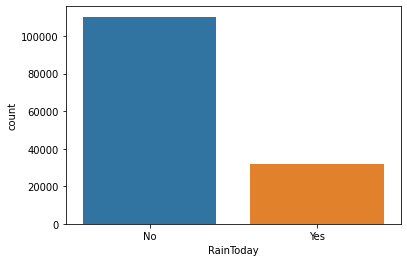

In [11]:
sns.countplot(data=data, x='RainToday')

In [12]:
by_Rain = data["RainToday"].value_counts()
by_Rain = pd.DataFrame(by_Rain)
by_Rain

,RainToday
No,110319
Yes,31880


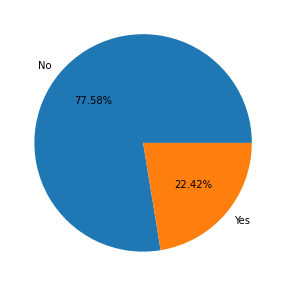

In [13]:
plt.figure(figsize=(10,5))
plt.pie(by_Rain['RainToday'], labels=by_Rain.index,
       autopct='%.2f%%')
plt.show()

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

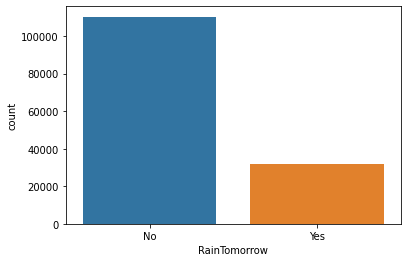

In [14]:
sns.countplot(data=data, x='RainTomorrow')

In [15]:
by_RainT = data["RainTomorrow"].value_counts()
by_RainT = pd.DataFrame(by_RainT)
by_RainT

,RainTomorrow
No,110316
Yes,31877


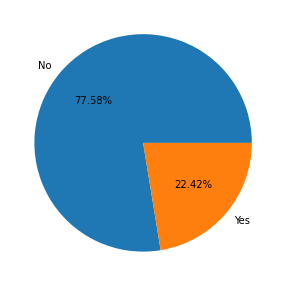

In [16]:
plt.figure(figsize=(10,5))
plt.pie(by_RainT['RainTomorrow'], labels=by_RainT.index,
       autopct='%.2f%%')
plt.show()

In [17]:
data.dropna(subset = ["RainToday", "RainTomorrow"], inplace=True)

Disini saya menghapus data nan dari kolom RainToday dan RainTomorrow karena jika salah satu kolom dijadikan target dan data nan diisi oleh modus dari kolom tersebut, nantinya data akan imbalance, jadi saya hapus data nan tersebut

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140787 non-null  datetime64[ns]
 1   Location       140787 non-null  object        
 2   MinTemp        140319 non-null  float64       
 3   MaxTemp        140480 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81093 non-null   float64       
 6   Sunshine       73982 non-null   float64       
 7   WindGustDir    131624 non-null  object        
 8   WindGustSpeed  131682 non-null  float64       
 9   WindDir9am     131127 non-null  object        
 10  WindDir3pm     137117 non-null  object        
 11  WindSpeed9am   139732 non-null  float64       
 12  WindSpeed3pm   138256 non-null  float64       
 13  Humidity9am    139270 non-null  float64       
 14  Humidity3pm    137286 non-null  float64       
 15  

In [19]:
data["Date"].dt.month.value_counts()

5     12931
3     12885
1     12797
6     12258
10    11710
7     11660
8     11648
11    11352
9     11222
4     11210
12    10703
2     10411
Name: Date, dtype: int64

In [20]:
data.groupby(data["Date"].dt.year)["RainTomorrow"].value_counts()

Date  RainTomorrow
2007  No                 42
      Yes                19
2008  No               1730
      Yes               499
2009  No              12937
      Yes              3577
2010  No              12267
      Yes              3924
2011  No              11326
      Yes              3657
2012  No              11591
      Yes              3303
2013  No              12563
      Yes              3372
2014  No              13734
      Yes              3447
2015  No              13511
      Yes              3578
2016  No              13234
      Yes              4107
2017  No               6651
      Yes              1718
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

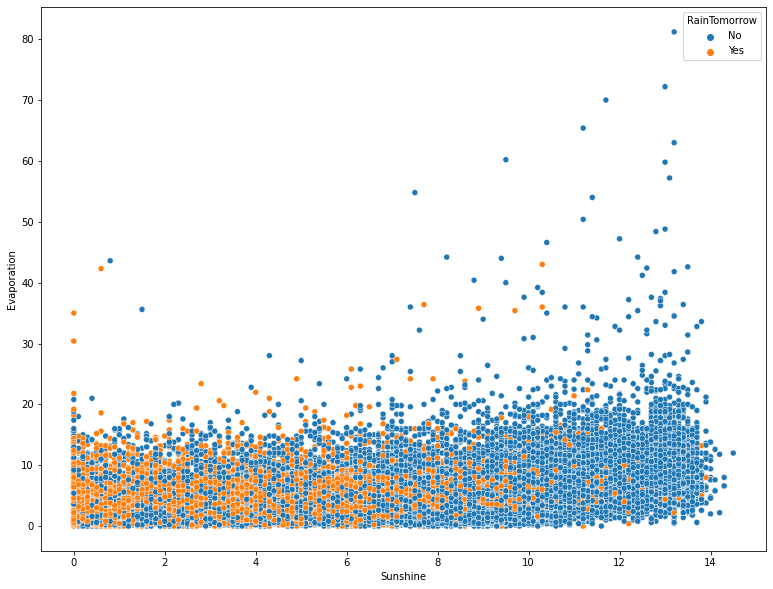

In [21]:
plt.figure(figsize=(13,10))
sns.scatterplot(data=data,x='Sunshine',y="Evaporation",hue='RainTomorrow')

Kebanyakan hujan akan terjadi saat penguapan rendah dan intensitas sinar matahari juga rendah, dan jika penguapan tinggi dan intensitas sinar matahari tinggi, jarang terjadi hujan

<AxesSubplot:xlabel='Temp3pm', ylabel='Temp9am'>

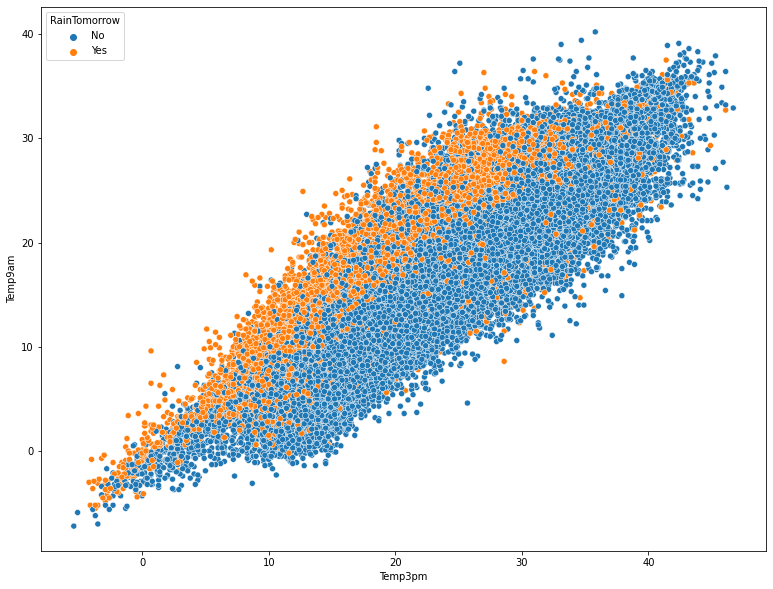

In [22]:
plt.figure(figsize=(13,10))
sns.scatterplot(data=data,x='Temp3pm',y="Temp9am",hue='RainTomorrow')

Hujan akan terjadi, biasanya saat temperatur saat jam 9 pagi dan 3 sore relatif tidak terlalu berbeda, jika temperatur saat jam 9 pagi lebih rendah dari temperatur jam 3 sore, biasanya tidak akan turun hujan

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

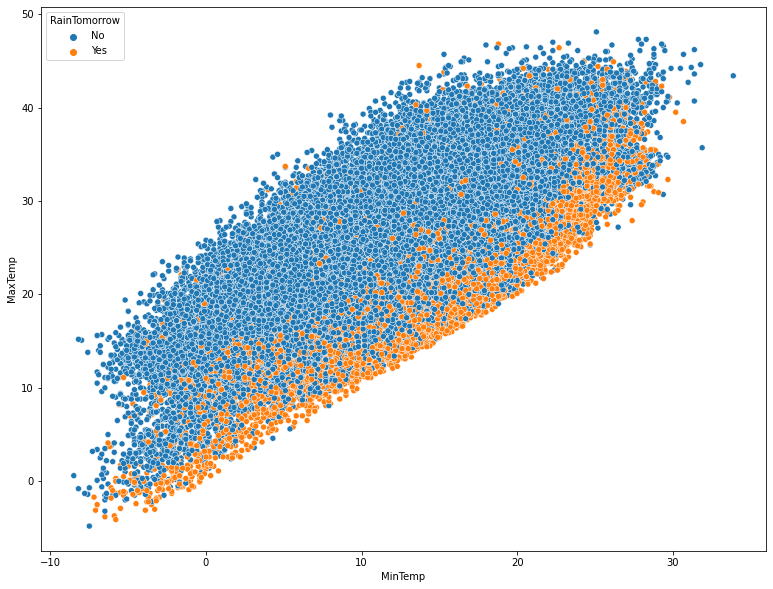

In [23]:
plt.figure(figsize=(13,10))
sns.scatterplot(data=data,x='MinTemp',y="MaxTemp",hue='RainTomorrow')

Biasanya sebelum hujan akan terjadi, di daerah tersebut bersuhu rendah

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Rainfall'>

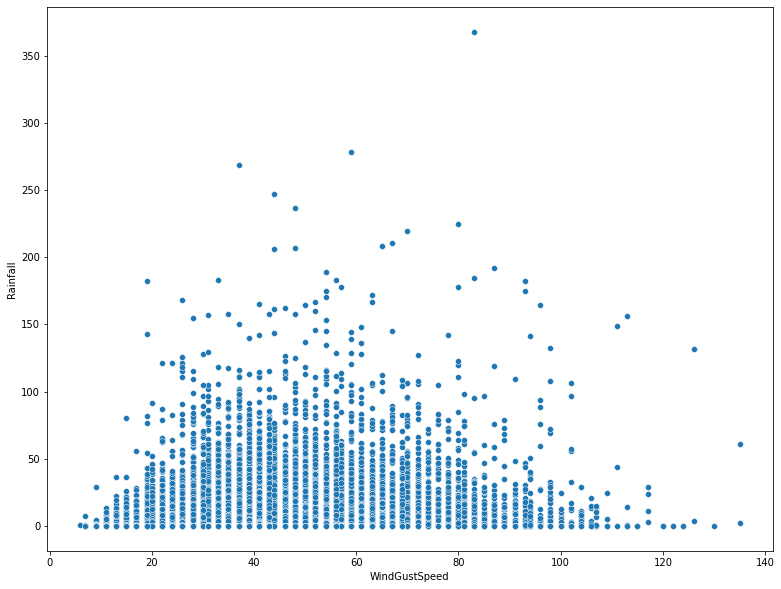

In [24]:
plt.figure(figsize=(13,10))
sns.scatterplot(data=data,x='WindGustSpeed',y="Rainfall")

Kecepatan angin belum tentu mempengaruhi seberapa besar hujan atau deras hujan turun

In [25]:
cc = data.groupby("RainTomorrow")[["Pressure9am", "Pressure3pm"]].mean()
cc

,Pressure9am,Pressure3pm
RainTomorrow,,
No,1018.596549,1016.115015
Yes,1014.351961,1012.250719


Tekanan udara saat hujan akan terjadi akan lebih rendah dibandingkan dengan rata rata tekanan udara saat hujan tidak akan terjadi

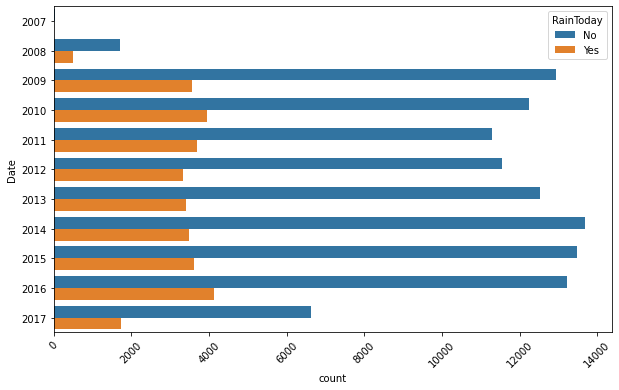

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(y=data["Date"].dt.year, hue=data["RainToday"])
plt.xticks(rotation=45)
plt.show()

Hujan paling banyak terjadi saat tahun 2016 dan tahun 2010, dimana tahun 2008 paling jarang terjadi hujan

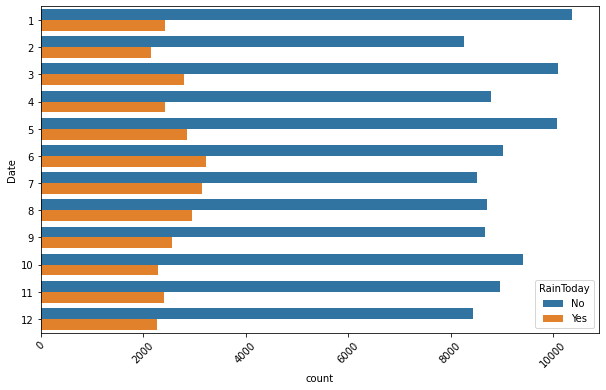

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(y=data["Date"].dt.month, hue=data["RainToday"])
plt.xticks(rotation=45)
plt.show()

Hujan paling banyak terjadi saat bulan ke 3-8, dikarenakan bulan ke 3-8 itu sudah memasuki musim gugur-musim dingin di Australia, sehingga intensitas hujan lebih sering terjadi di bulan tersebut

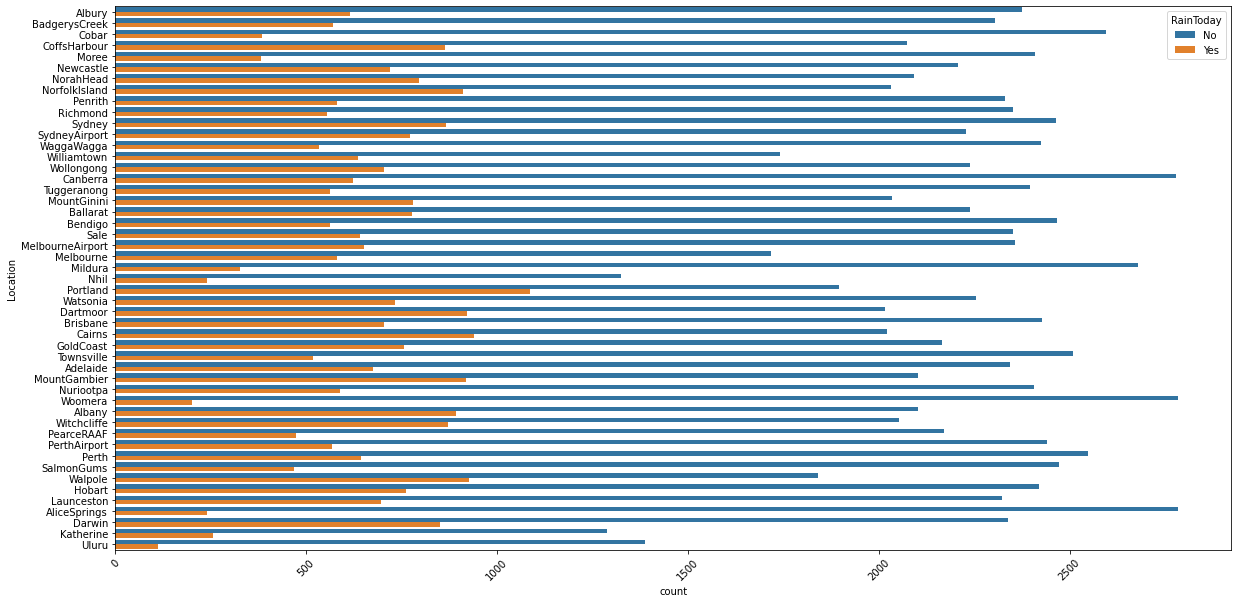

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(y=data["Location"], hue=data["RainToday"])
plt.xticks(rotation=45)
plt.show()

In [29]:
l = pd.DataFrame(data.groupby(data["Location"])["RainTomorrow"].value_counts())
l

RainTomorrow
Location    RainTomorrow              
Adelaide    No                    2365
            Yes                    655
Albany      No                    2105
            Yes                    891
Albury      No                    2376
...                                ...
Witchcliffe Yes                    870
Wollongong  No                    2238
            Yes                    705
Woomera     No                    2786
            Yes                    198

[98 rows x 1 columns]

Kota yang paling banyak terjadi curah hujan adalah di Portland, dan yang paling sedikit berada di Canbera

In [30]:
data1 = data.copy()

In [31]:
#Encode Data
data1['RainTomorrow'].replace(['Yes', 'No'],[0,1], inplace=True)

<AxesSubplot:>

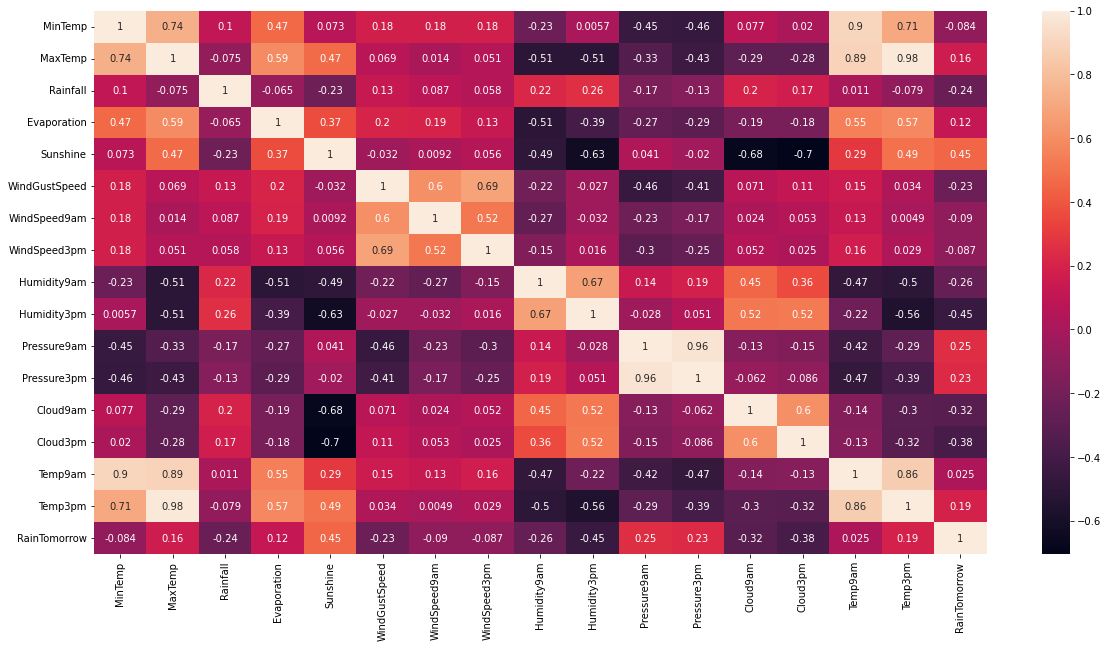

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(data1.corr(), annot = True)

In [33]:
korelasi = pd.DataFrame(data1.corr())
korelasi.sort_values("RainTomorrow", ascending=False)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
RainTomorrow,-0.084322,0.159405,-0.239032,0.119133,0.451820,-0.234285,-0.089803,-0.086762,-0.257727,-0.447834,0.248253,0.228192,-0.316592,-0.382418,0.025447,0.192747,1.000000
Sunshine,0.073078,0.470221,-0.227525,0.366659,1.000000,-0.032196,0.009188,0.056480,-0.492784,-0.629638,0.041071,-0.020276,-0.675846,-0.704621,0.291364,0.490386,0.451820
Pressure9am,-0.451414,-0.331831,-0.168085,-0.269850,0.041071,-0.457710,-0.227540,-0.295207,0.138916,-0.028127,1.000000,0.961343,-0.130385,-0.148855,-0.422635,-0.286890,0.248253
Pressure3pm,-0.462099,-0.427069,-0.126728,-0.293098,-0.020276,-0.412879,-0.174497,-0.254951,0.186515,0.051244,0.961343,1.000000,-0.061504,-0.085753,-0.470316,-0.389684,0.228192
Temp3pm,0.708716,0.984565,-0.079178,0.574311,0.490386,0.033511,0.004878,0.028845,-0.500528,-0.558562,-0.286890,-0.389684,-0.302840,-0.318336,0.860633,1.000000,0.192747
MaxTemp,0.736015,1.000000,-0.074839,0.588934,0.470221,0.068510,0.014468,0.051178,-0.506109,-0.509916,-0.331831,-0.427069,-0.290217,-0.279261,0.887038,0.984565,0.159405
Evaporation,0.467147,0.588934,-0.064549,1.000000,0.366659,0.203396,0.194398,0.129166,-0.506055,-0.393149,-0.269850,-0.293098,-0.185211,-0.184395,0.545382,0.574311,0.119133
Temp9am,0.901828,0.887038,0.011477,0.545382,0.291364,0.150574,0.129108,0.163972,-0.473305,-0.222227,-0.422635,-0.470316,-0.138127,-0.128150,1.000000,0.860633,0.025447
MinTemp,1.000000,0.736015,0.104255,0.467147,0.073078,0.177927,0.175775,0.175835,-0.234441,0.005686,-0.451414,-0.462099,0.077367,0.020268,0.901828,0.708716,-0.084322
WindSpeed3pm,0.175835,0.051178,0.057759,0.129166,0.056480,0.686881,0.519980,1.000000,-0.145967,0.016011,-0.295207,-0.254951,0.052370,0.024769,0.163972,0.028845,-0.086762


Terdapat korelasi yang cukup baik antara kolom Humidity, Cloud, Rainfall, sunshine dan Pressure, sehingga kolom ini yang akan saya pakai untuk pemodelan

In [34]:
dat_fin = data1[["Humidity9am", "Humidity3pm", "Cloud9am", "Cloud3pm","Pressure9am", "Pressure3pm", "Rainfall", "Sunshine", "RainTomorrow"]]
dat_fin.head()

,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Pressure9am,Pressure3pm,Rainfall,Sunshine,RainTomorrow
0,71.0,22.0,8.0,NaN,1007.7,1007.1,0.6,NaN,1
1,44.0,25.0,NaN,NaN,1010.6,1007.8,0.0,NaN,1
2,38.0,30.0,NaN,2.0,1007.6,1008.7,0.0,NaN,1
3,45.0,16.0,NaN,NaN,1017.6,1012.8,0.0,NaN,1
4,82.0,33.0,7.0,8.0,1010.8,1006.0,1.0,NaN,1


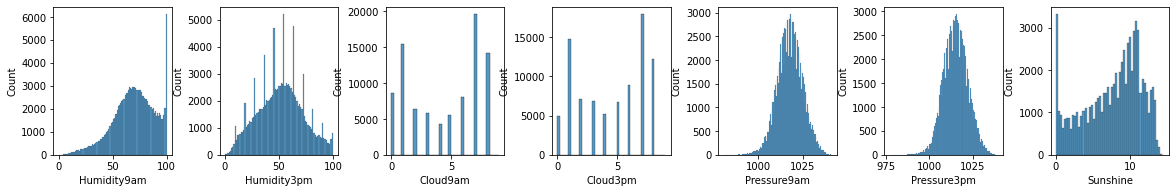

In [35]:
col_numeric = ["Humidity9am","Humidity9am", "Humidity3pm", "Cloud9am", "Cloud3pm","Pressure9am", "Pressure3pm", "Sunshine"]
fig = plt.figure(figsize=(20, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(col_numeric)):
    ax = fig.add_subplot(5, 7, i)

    sns.histplot(dat_fin[col_numeric[i]])
    plt.xlabel(col_numeric[i])
    

Persebaran data dari feature yang akan digunakan rata rata distribusi cukup normal

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

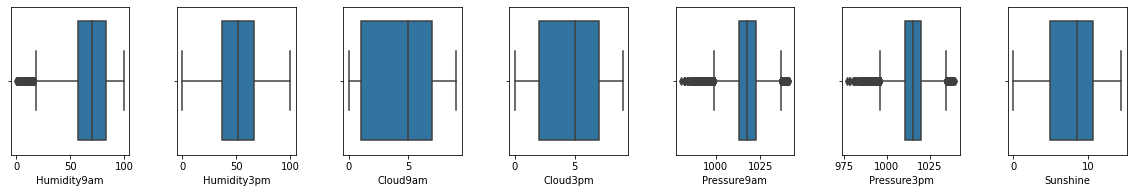

In [36]:
fig = plt.figure(figsize=(20, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(col_numeric)):
    ax = fig.add_subplot(5, 7, i)
#     ax.hist(new_df[col_numeric[i]])
    sns.boxplot(dat_fin[col_numeric[i]])
    plt.xlabel(col_numeric[i])
    

Dilihat dari distribusi, rata rata feature yang akan digunakan merupakan data dengan distribusi yang normal, dan berdasarkan boxplot, terdapat outliers di kolom Humidity9am, Pressure9am dan Pressure3pm, namun dilihat dari describe data tersebut dan beberapa literatur yang saya cari menunjukan bahwa nilai data tersebut masih wajar, dan tidak ada anomali yang aneh, sehingga disini tidak saya anggap sebagai outliers

## Modeling

In [37]:
#Train Test Split
X = dat_fin.drop(['RainTomorrow'], axis=1)
y = dat_fin['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size =0.2, random_state=49)

### Fill Missing Value

In [38]:
X_train.fillna(X_train.median(), inplace=True)

In [39]:
X_test.fillna(X_train.median(), inplace=True)

In [40]:
#Model
logreg = LogisticRegression(solver = "liblinear", random_state=49)
m_svm = SVC(kernel = "linear", C=0.5)

### Pipeline

In [41]:
logreg_pipe = Pipeline([("scaler", StandardScaler()), ("logreg", logreg)])

In [42]:
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(random_state=49, solver='liblinear'))])

In [43]:
svm_pipe = Pipeline([("scaler", StandardScaler()), ("svc", m_svm)])

In [44]:
svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=0.5, kernel='linear'))])

In [45]:
y_pred = logreg_pipe.predict(X_test)
print("LOGREG Test Score: ", logreg_pipe.score(X_test, y_test))

LOGREG Test Score:  0.8358903331202501


In [46]:
print("LOGREG Train Score: ", logreg_pipe.score(X_train, y_train))

LOGREG Train Score:  0.8377504905486154


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.45      0.55      6240
           1       0.86      0.95      0.90     21918

    accuracy                           0.84     28158
   macro avg       0.78      0.70      0.72     28158
weighted avg       0.82      0.84      0.82     28158



In [48]:
y_pred = svm_pipe.predict(X_test)
print("SVC Test Score: ", svm_pipe.score(X_test, y_test))

SVC Test Score:  0.8359613608921088


In [49]:
print("SVC Train Score: ", svm_pipe.score(X_train, y_train))

SVC Train Score:  0.836889255875485


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.41      0.53      6240
           1       0.85      0.96      0.90     21918

    accuracy                           0.84     28158
   macro avg       0.79      0.68      0.71     28158
weighted avg       0.82      0.84      0.82     28158



### Cross Validation 

In [51]:
logreg_score = cross_val_score(logreg_pipe, X_train, y_train, scoring='recall', cv=5, n_jobs=-1, verbose=1)
svm_score = cross_val_score(svm_pipe, X_train, y_train, scoring='recall', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.4s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.2min remaining:  9.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.3min finished


In [52]:
print('Logistic Regression Val Score:', logreg_score.mean(), "STD: ", logreg_score.std())
print('SVM Val Score:', svm_score.mean(), "STD: ", svm_score.std())

Logistic Regression Val Score: 0.9472555658068462 STD:  0.002436428711877714
SVM Val Score: 0.9573618776764006 STD:  0.0020317481054409393


Scoring yang dipilih disini adalah Recall, karena saya ingin fokus untuk menekan nilai FN. Hasil dari Cross Validation Score menunjukan bahwa nilai rata2 dari kedua model ini yang paling bagus adalah model SVC dengan nilai rata rata 0.95 dan Logistic regression 0.94

### Model Evaluation Logistic Regression

In [53]:
y_pred = logreg_pipe.predict(X_test)
print("LOGREG Test Score: ", logreg_pipe.score(X_test, y_test))
print("LOGREG Train Score: ", logreg_pipe.score(X_train, y_train))

LOGREG Test Score:  0.8358903331202501
LOGREG Train Score:  0.8377504905486154


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.45      0.55      6240
           1       0.86      0.95      0.90     21918

    accuracy                           0.84     28158
   macro avg       0.78      0.70      0.72     28158
weighted avg       0.82      0.84      0.82     28158



C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


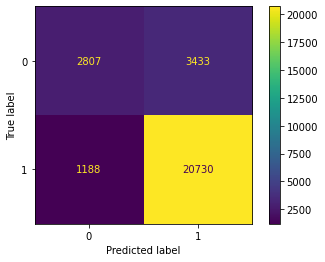

In [55]:
plot_confusion_matrix(logreg_pipe, X_test, y_test)

Dari confussion metrics, nilai TN atau Actual 0 dan Predict 0 berada di angka 2807, menandakan yang di predict hujan dan benar ada 2807 data, sedangkan TP atau Actual 1 dan Predict 1 berada di angka 20730, atau yang di predict tidak hujan dan benar ada 20730 data, sedangkan FN berada di angka 1188 dan FP berada di angka 3433

In [56]:
proba = logreg_pipe.predict_proba(X_test)
proba_1 = proba[:,1]
fpr, tpr, thr = roc_curve(y_test, proba_1)
auc_score = auc(fpr, tpr)

In [57]:
pr, rc, thrs = precision_recall_curve(y_test, proba_1)
pr_df = pd.DataFrame({'Precision': pr[:-1], 'Recall': rc[:-1], 'Thresholds': thrs})
pr_df

,Precision,Recall,Thresholds
0,0.778559,1.000000,0.003021
1,0.778551,0.999954,0.003059
2,0.778579,0.999954,0.003188
3,0.778607,0.999954,0.003493
4,0.778634,0.999954,0.003641
...,...,...,...
27881,1.000000,0.000228,0.997684
27882,1.000000,0.000182,0.997797
27883,1.000000,0.000137,0.997964
27884,1.000000,0.000091,0.998261


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


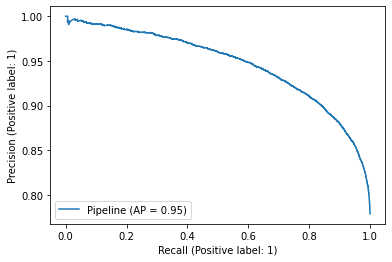

In [58]:
plot_precision_recall_curve(logreg_pipe, X_test, y_test)

Dari PR-Curve didapatkan nilai yang cukup baik, dimana nilai Precision tinggi nilai recall tidak berbeda jauh, begitu pula sebaliknya

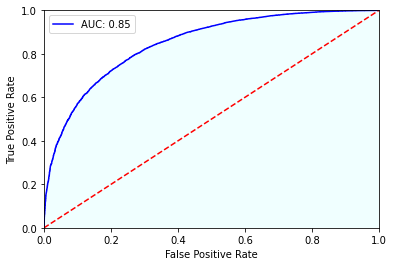

In [59]:
plt.plot(fpr, tpr, 'blue', label= f'AUC: {round(auc_score, 2)}')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fpr, tpr, 0, facecolor='azure', alpha=1)
plt.legend()
plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


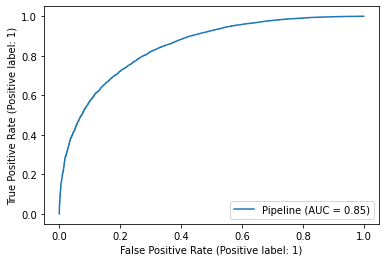

In [60]:
plot_roc_curve(logreg_pipe, X_test, y_test)

Dari grafik ROC-AUC juga menunjukan nilai yang cukup baik, dimana nilai AUC berkisar 0.85 dan nilai TPR yang cukup baik

### Model Evaluation SVC

In [61]:
y_pred = svm_pipe.predict(X_test)
print("SVM Test Score: ", svm_pipe.score(X_test, y_test))
print("SVM Train Score: ", svm_pipe.score(X_train, y_train))

SVM Test Score:  0.8359613608921088
SVM Train Score:  0.836889255875485


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.41      0.53      6240
           1       0.85      0.96      0.90     21918

    accuracy                           0.84     28158
   macro avg       0.79      0.68      0.71     28158
weighted avg       0.82      0.84      0.82     28158



C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


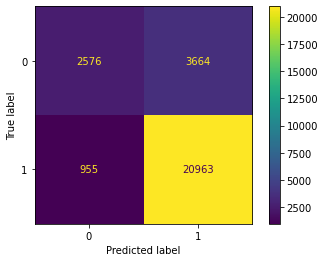

In [63]:
plot_confusion_matrix(svm_pipe, X_test, y_test)

Dari confussion metrics SVM, nilai TN atau Actual 0 dan Predict 0 berada di angka 2576, menandakan yang di predict hujan dan benar ada 2576 data, sedangkan TP atau Actual 1 dan Predict 1 berada di angka 20963, atau yang di predict tidak hujan dan benar ada 20963 data, sedangkan FN berada di angka 955 dan FP berada di angka 3664, sekilas, model SVM ini lebih baik dalam menekan nilai FN dibandingkan dengan model Logistic Regression

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


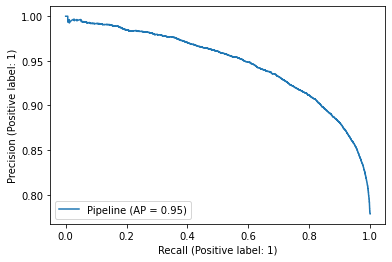

In [64]:
plot_precision_recall_curve(svm_pipe, X_test, y_test)

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


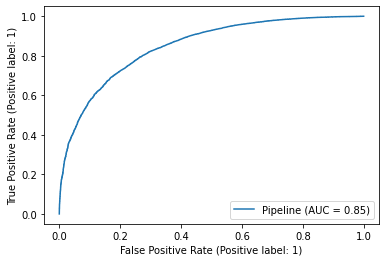

In [65]:
plot_roc_curve(svm_pipe, X_test, y_test)

Dari grafik ROC-AUC dan PR curve menunjukan nilai yang cukup bagus dan menunjukan performa dari kedua model ini hampir sama

### HYPERPARAMETER TUNING (OPTIONAL)

In [66]:
# logreg_pipe.get_params().keys()

In [67]:
# logreg_param = {'logreg__solver': ["liblinear"], 
#              'logreg__penalty': ["l1", "l2"], 
#              'logreg__C': [10, 1, 0.1]}

# logreg_tuned = GridSearchCV(estimator=logreg_pipe,
#                           param_grid=logreg_param, 
#                           cv=5,
#                           n_jobs=-1,
#                           scoring='recall',
#                           verbose=1
#                           )

In [68]:
# logreg_tuned.fit(X_train, y_train)

In [69]:
# logreg_tuned.best_params_

In [70]:
# logreg_tun = logreg_tuned.best_estimator_

In [71]:
# logreg_tuned_score = cross_val_score(logreg_tun, X_train, y_train, scoring='recall', cv=5, n_jobs=-1, verbose=1)
# logreg_tuned_score.mean()

In [72]:
# svm_pipe.get_params().keys()

In [73]:
# svm_param = {'svc__kernel': ["linear", "poly"], 
#              'svc__gamma': [0.1, 1], 
#              'svc__C': [0.1, 1]}

# svm_tuned = GridSearchCV(estimator=svm_pipe,
#                           param_grid=svm_param, 
#                           cv=5,
#                           n_jobs=-1,
#                           scoring='recall',
#                           verbose=1
#                           )

Waktu Running Gridsearch dari SVM ini lebih dari 50 menit

In [74]:
# svm_tuned.fit(X_train, y_train)

In [75]:
# svm_tuned_score = cross_val_score(svm_tun, X_train, y_train, scoring='recall', cv=5, n_jobs=-1, verbose=1)
# svm_tuned_score.mean()

## Kesimpulan
- Kebanyakan hujan akan terjadi saat penguapan rendah dan intensitas sinar matahari juga rendah, dan jika penguapan tinggi dan intensitas sinar matahari tinggi, jarang terjadi hujan
- Biasanya sebelum hujan akan terjadi, di daerah tersebut bersuhu rendah
- Hujan paling banyak terjadi saat bulan ke 3-8, dikarenakan bulan ke 3-8 itu sudah memasuki musim gugur-musim dingin di Australia, sehingga intensitas hujan lebih sering terjadi di bulan tersebut
- Model yang digunakan adalah Logistic Regression dan SVC, nilai Recall dari Cross Validation dari Logistic Regression adalah 0.947 dan SVC adalah 0.957
- Dilihat dari kurva ROC dan PR, performa dari kedua model ini bisa dikatakan hampir setara
- Dilihat dari Confussion Metrics, performa SVM untuk menekan nilai FN lebih baik dari Logistic Regression

## Model Predict

In [76]:
pred = pd.DataFrame([{
    'Humidity9am': 55.0,
    'Humidity3pm': 22.0,
    'Cloud9am': 5.0,
    'Cloud3pm': 3.0,
    'Pressure9am': 1010.0,
    'Pressure3pm' : 1007.0,
    'Rainfall': 2.0,
    'Sunshine': 6.7
    }], index=[0])

In [77]:
pred

,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Pressure9am,Pressure3pm,Rainfall,Sunshine
0,55.0,22.0,5.0,3.0,1010.0,1007.0,2.0,6.7


In [78]:
result = svm_pipe.predict(pred)
if(result==0):
  print('Hujan')

else :
  print('Tidak Hujan')


Tidak Hujan
